In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

## 1) Coletando dados ficticios

In [2]:
# Especifique o caminho para o arquivo CSV
caminho_arquivo_csv = "../Dados/alunos_vet_ficticios.csv"

# Carregue o arquivo CSV em um DataFrame
df = pd.read_csv(caminho_arquivo_csv)

df

,Media_Total,Coeficiente,Introducao_a_Programacao,Estrutura_de_Dados,Introducao_a_Programacao_Aprovado,Estrutura_de_Dados_Aprovado,Desempenho
0,9.626715,10.644896,3.088811,1.762699,0,0,Bem
1,9.960334,9.818715,4.464785,7.720980,0,1,Bem
2,8.740338,9.086914,2.740052,0.712933,0,0,Bem
3,7.774918,7.093310,0.930765,4.508544,0,0,Bem
4,5.637035,4.517239,6.393895,2.023240,1,0,Mal
...,...,...,...,...,...,...,...
995,7.914746,9.330353,0.823461,4.628386,0,0,Bem
996,7.816127,7.221967,2.966806,1.612926,0,0,Bem
997,7.139751,6.000495,0.525839,8.293730,0,1,Médio
998,8.311339,8.480750,8.148992,3.742535,1,0,Bem


### 1.1) Dividir os dados em recursos (X) e rótulos (y)

In [3]:
X = df[['Media_Total', 'Coeficiente', 'Introducao_a_Programacao', 'Estrutura_de_Dados']]
y = df['Desempenho']

## 2) Divisão em dados de treinamento e teste

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# # Normalização dos dados
# vectorizer = CountVectorizer()
# X_train_vec = vectorizer.fit_transform(X_train)
# X_test_vec = vectorizer.transform(X_test)

## 3) Treinando modelo 

In [5]:
# Ajuste de hiperparâmetros usando GridSearchCV
param_grid = {
     'priors': [None, [0.2, 0.3, 0.5]], # Teste diferentes prior probabilities para classes
}

# Ajuste de hiperparâmetros usando GridSearchCV
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_naive_bayes = grid_search.best_estimator_

# Treinamento do modelo Naive Bayes Multinomial com os melhores hiperparâmetros encontrados
best_naive_bayes.fit(X_train, y_train)

GaussianNB()

## 4) Predição

In [6]:
y_pred = best_naive_bayes.predict(X_test)

## 5) Matriz Confusão

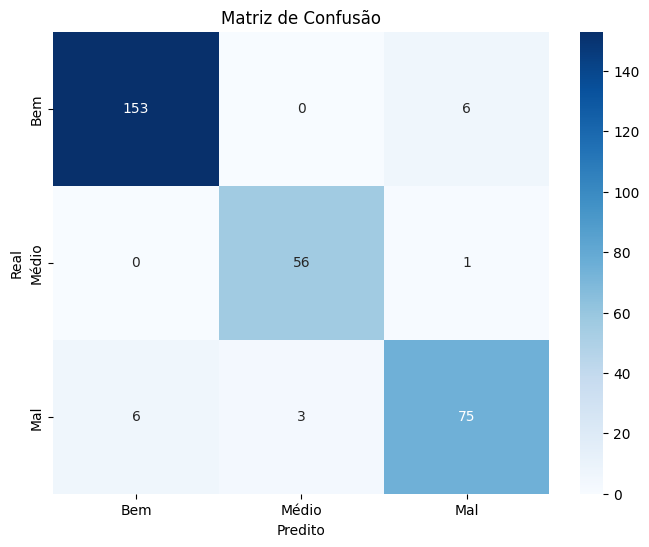

In [7]:
# Calcule a matriz de confusão
cm = confusion_matrix(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos

# Crie uma visualização da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Bem', 'Médio', 'Mal'], yticklabels=['Bem', 'Médio', 'Mal'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

## 6) Métricas de eficácia

In [8]:
print(f'Melhores Hiperparâmetros Encontrados: {grid_search.best_params_}')

print("----------------------------------------------------------------\n")
accuracy = accuracy_score(y_test, y_pred)  
print(f'Acurácia do teste: {accuracy}')

print("----------------------------------------------------------------\n")
classification_rep = classification_report(y_test, y_pred)
print(f'Relatório de Classificação:\n{classification_rep}')

# precision = precision_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Precisão: {precision}')

# recall = recall_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Recall: {recall}')

# f1 = f1_score(y_test, y_pred)  # Substitua y_test e y_pred pelos seus dados reais e previstos
# print(f'Medida F: {f1}')

Melhores Hiperparâmetros Encontrados: {'priors': None}
----------------------------------------------------------------

Acurácia do teste: 0.9466666666666667
----------------------------------------------------------------

Relatório de Classificação:
              precision    recall  f1-score   support

         Bem       0.96      0.96      0.96       159
         Mal       0.95      0.98      0.97        57
       Médio       0.91      0.89      0.90        84

    accuracy                           0.95       300
   macro avg       0.94      0.95      0.94       300
weighted avg       0.95      0.95      0.95       300

